150 instances loaded.
   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa
5            5.4           3.9            1.7           0.4  Iris-setosa
6            4.6           3.4            1.4           0.3  Iris-setosa
7            5.0           3.4            1.5           0.2  Iris-setosa
8            4.4           2.9            1.4           0.2  Iris-setosa
9            4.9           3.1            1.5           0.1  Iris-setosa
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         -------

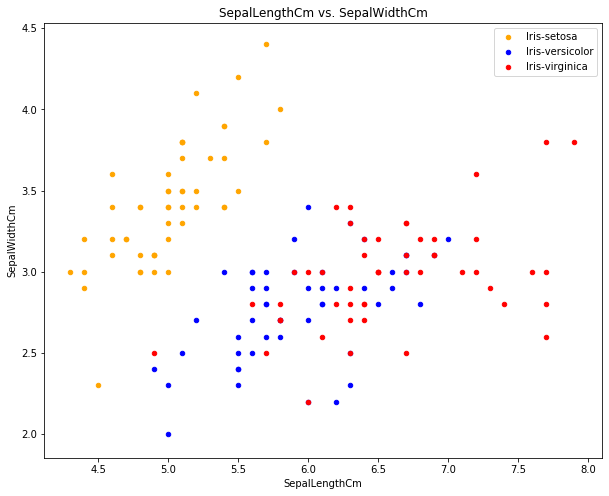

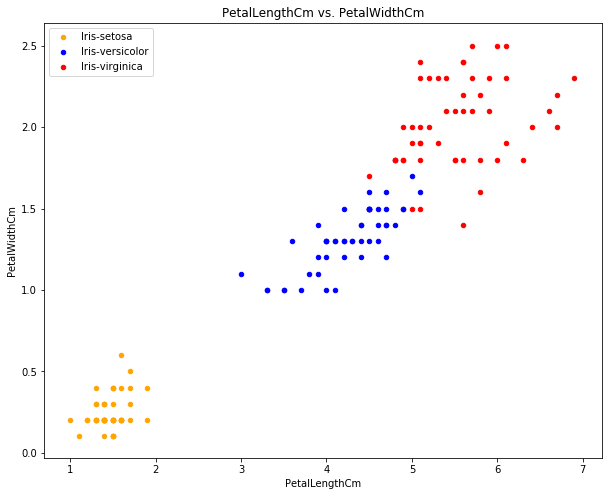

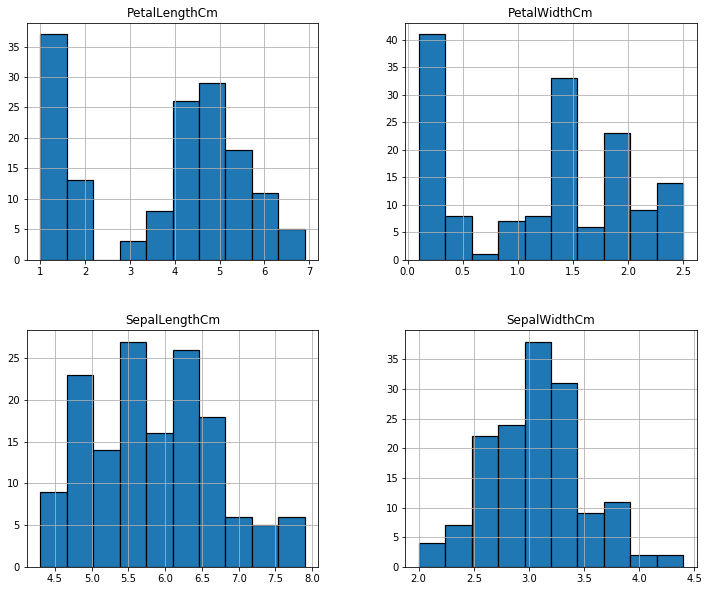

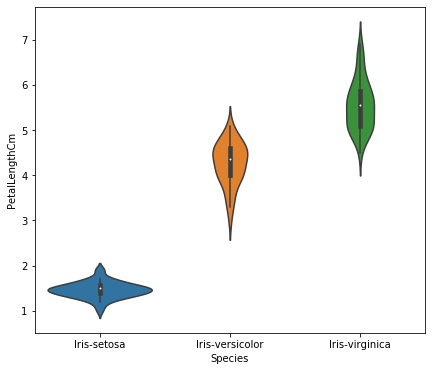

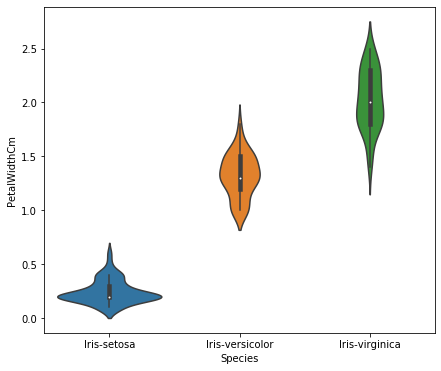

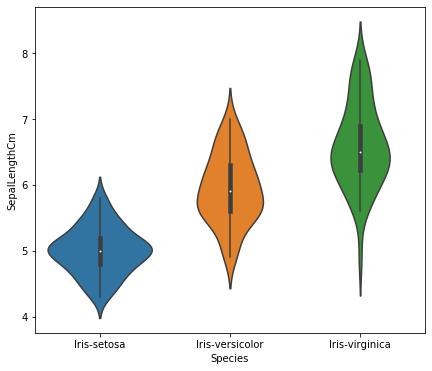

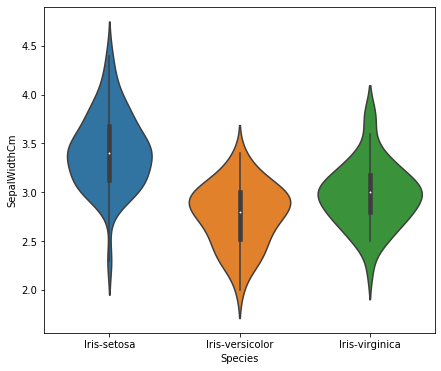

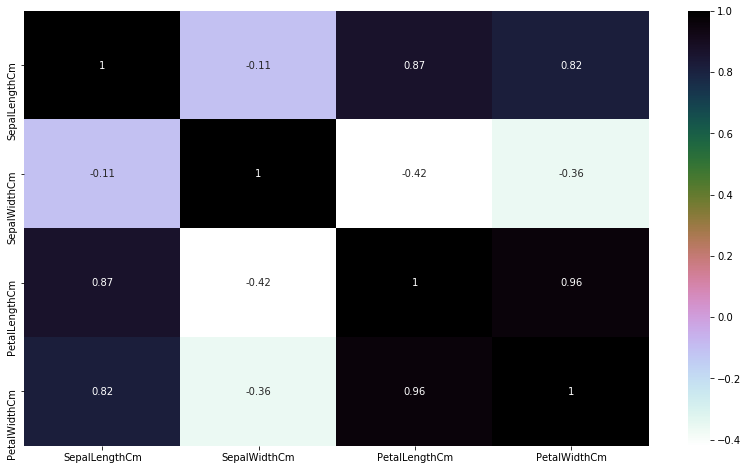

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species  \
0            5.1           3.5            1.4           0.2  Iris-setosa   
1            4.9           3.0            1.4           0.2  Iris-setosa   
2            4.7           3.2            1.3           0.2  Iris-setosa   
3            4.6           3.1            1.5           0.2  Iris-setosa   
4            5.0           3.6            1.4           0.2  Iris-setosa   
5            5.4           3.9            1.7           0.4  Iris-setosa   
6            4.6           3.4            1.4           0.3  Iris-setosa   
7            5.0           3.4            1.5           0.2  Iris-setosa   
8            4.4           2.9            1.4           0.2  Iris-setosa   
9            4.9           3.1            1.5           0.1  Iris-setosa   

   Species2  
0         0  
1         0  
2         0  
3         0  
4         0  
5         0  
6         0  
7         0  
8         0  
9         0  
<class 'p

In [1]:
import numpy as np # linear algebra
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

# 다양한 분류 알고리즘 패키지를 임포트함.
from sklearn.model_selection import train_test_split # 데이타 쪼개주는 모듈 
from sklearn.neighbors import KNeighborsClassifier  # for K nearest neighbours
from sklearn.tree import DecisionTreeClassifier #for using Decision Tree Algoithm
from sklearn import svm  #for Support Vector Machine (SVM) Algorithm
from sklearn.linear_model import LogisticRegression  # Logistic Regression 알고리즘
from sklearn import metrics #for checking the model accuracy

class MyMLTool:
    df = 0
    # 파일을 읽어서 2차원 테이블 형식의 데이터 프레임을 만듬.
    def read(self, fn):
        imsi = pd.read_csv(fn) 
        print(len(imsi), 'instances loaded.')
        self.df = imsi
        
    # 데이터 프레임에 들어있는 10개 데이터 보여줌.
    # 데이터에 비어있는(널) 값이 있는지 확인할 수 있음.
    def show(self):
        print(self.df.head(10))
        self.df.info()

    # 불필요한 Id 컬럼 삭제
    # axis=1 : 컬럼을 의미
    # inplace=1 : 삭제한 후 데이터 프레임에 반영
    def drop(self, col):
        self.df.drop(col,axis=1,inplace=True) 

    #myplot(df, 'SepalLengthCm', 'SepalWidthCm', 'Species')
    def myplot(self, x_col, y_col, color_field):
        cl = self.df[color_field].unique()
        col = ['orange', 'blue', 'red', 'yellow', 'black', 'brown']

        fig = self.df[self.df[color_field] == cl[0]].plot(kind='scatter', x=x_col, y=y_col, color=col[0], label=cl[0])
        for i in range(len(cl)-1):
            self.df[self.df[color_field] == cl[i+1]].plot(kind='scatter', x=x_col, y=y_col, color=col[i+1], label=cl[i+1], ax=fig)

        fig.set_xlabel(x_col)
        fig.set_ylabel(y_col)
        fig.set_title(x_col + " vs. " + y_col)
        fig=plt.gcf()
        fig.set_size_inches(10, 8)
        plt.show()

    def myhist(self):
        self.df.hist(edgecolor='black', linewidth=1.2)
        fig = plt.gcf()
        fig.set_size_inches(12,10)
        plt.show()

    def myviolineplot(self, a, b):
        plt.figure(figsize=(7,6))
        plt.subplot(1,1,1)
        sns.violinplot(x=a, y=b, data=self.df)

    def heatmap(self):
        plt.figure(figsize=(14,8)) 
        sns.heatmap(self.df.corr(),annot=True,cmap='cubehelix_r')
        plt.show()

    #gildong.replace('Species', {"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica" : 2}, 'Species2')        
    def replace(self, src, mapping, target):
        self.df[target] = self.df[src].map(mapping)     

    def extract(self, cols):
        t = self.df[cols]
        return t

    #학습 데이터와 테스트 데이터로 나누기
    def split(self, ratio = 0.7):
        a, b = train_test_split(self.df, train_size=ratio, random_state=0)
        print(a.shape)
        print(b.shape)
        return a, b

    def prepare_4_data(self, input_cols, target):
        train, test = self.split()

        train_X = train[input_cols] #학습 입력
        train_y = train[target] #학습 정답

        test_X = test[input_cols] #학습 입력
        test_y = test[target] #학습 정답
        return train_X, train_y, test_X, test_y        
    
    def run_dt(self, a, b, c, d):
        model = DecisionTreeClassifier()
        model.fit(a, b) 
        prediction=model.predict(c) 
        print('Decision Tree:',metrics.accuracy_score(prediction, d)*100)

    def run_kn(self, a, b, c, d):
        model = KNeighborsClassifier(n_neighbors=3) 
        model.fit(a, b) 
        prediction = model.predict(c) 
        print('K-Neighbors:',metrics.accuracy_score(prediction, d)*100)

    def run_sv(self, a, b, c, d):
        model=svm.SVC()
        model.fit(a, b) 
        prediction = model.predict(c) 
        print('Support Vector Machine:',metrics.accuracy_score(prediction, d)*100)

    def run_lr(self, a, b, c, d):
        model = LogisticRegression()
        model.fit(a, b) 
        prediction=model.predict(c) 
        print('Logistic Regression:',metrics.accuracy_score(prediction, d)*100)

    def run_multiple_kn(self, start, end, tr_X, tr_y, te_X, te_y):
        print(list(range(start,end+1)))

        a = [0]
        for i in list(range(start, end+1)):
            model = KNeighborsClassifier(n_neighbors = i) 
            model.fit(tr_X, tr_y)
            prediction = model.predict(te_X)
            score = metrics.accuracy_score(prediction,te_y)*100
            a.append(score)
            print(i, score)

        plt.figure(figsize=(12, 7))
        plt.plot(a)
        plt.ylabel('Rate')
        plt.xticks(list(range(start-1,end+1)))
        plt.show()

    def split_run_dt(self, input_cols, target):
        train_X, train_y, test_X, test_y = self.prepare_4_data(input_cols, target)

        self.run_dt(train_X, train_y, test_X, test_y)

    def split_run_kn(self, input_cols, target):
        train_X, train_y, test_X, test_y = self.prepare_4_data(input_cols, target)

        self.run_kn(train_X, train_y, test_X, test_y)

    def split_run_sv(self, input_cols, target):
        train_X, train_y, test_X, test_y = self.prepare_4_data(input_cols, target)

        self.run_sv(train_X, train_y, test_X, test_y)

    def split_run_lr(self, input_cols, target):
        train_X, train_y, test_X, test_y = self.prepare_4_data(input_cols, target)

        self.run_lr(train_X, train_y, test_X, test_y)


# data = pd.read_csv(r'C:\Users\ssjy1\kaggle\datasets\datasets_iris.csv')
# data.head(10)
# data.describe()

iris_classification = MyMLTool()
iris_classification.read('../datasets/datasets_iris.csv')
# iris_classification.show()
iris_classification.drop('Id')
iris_classification.show()
iris_classification.myplot('SepalLengthCm', 'SepalWidthCm', 'Species')

iris_classification.myplot('PetalLengthCm', 'PetalWidthCm', 'Species')

iris_classification.myhist()

iris_classification.myviolineplot('Species', 'PetalLengthCm')

iris_classification.myviolineplot('Species', 'PetalWidthCm')

iris_classification.myviolineplot('Species', 'SepalLengthCm')

iris_classification.myviolineplot('Species', 'SepalWidthCm')

iris_classification.heatmap()

iris_classification.replace('Species', {"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica" : 2}, 'Species2')   
iris_classification.show()